Какие факторы влияют на приемлемость результатов АБ теста? 
Взаимосвязаны между собой и определяют применимость теста:
* Ошибка 1(лп) и 2 (ло) рода
* Размер выборки
* Обобщающая способность (результаты тестирования мужчин нельзя обобщать на женщин)
* Размер эффекта (чем меньший эффект мы хотим зафиксировать, тем сложнее это сделать)

РАЗМЕР ЭФФЕКТА

Сколько наблюдений (N) требуется для проверки бинарного показателя, например конверсии (покупка/показы)? 
Для бинарного показателя 
N=p*(p-1)*a^2/mde^2

p это изначальная вероятность конверсии, задаем ее равной 10%;
a^2 доверительный интервал;
a=1.96 Если требуется получить доверительный интервал в 95%, при условии нормальго распределения, берется 1.9 среднеквадратечных отклонений (sd). В него попадают 95% всех наблюдений из этого нормального распределения.
MDE. Minimum Detectable Effect  это минимальный эффект который можем различить (принимаем 10% от предполагаемого роста конверсии, полученной в результате применения исследуемого эффекта)

при предположении что конверсия вырастит на 10%:
N=0.1*0.9*1.96^2/(0.1^2)=0.36/(0.01^2)= 3600 наблюдений

при предположении что конверсия вырастит на 5%:
N=0.36/(0.005^2)=14400

при предположении что конверсия вырастит на 1%:
N=0.36/(0.001^2)=360000

При множественном сравнении есть небольшая ловушка

In [74]:
import numpy as np
from tqdm.notebook import trange
from scipy.stats import ttest_ind

Генерируем два распределения с одинаковыми параметрами

In [14]:
normal_distr_1 = []
normal_distr_2 = []
normal_distr_1 += np.random.normal(100, 10, 10000).tolist()
normal_distr_2 += np.random.normal(100, 10, 10000).tolist()

In [11]:
normal_distr_1

[90.9794449569669,
 88.98585247536745,
 95.62754924781552,
 99.53230707393875,
 100.4122142641284,
 93.0950639230154,
 97.49145325985033,
 87.68294207827861,
 115.9908292581315,
 103.7977627002515,
 98.12276876339497,
 105.13990247796201,
 102.33439756605704,
 82.01414379683331,
 100.27332267023819,
 110.74959507227095,
 83.70441786185916,
 100.93426603121813,
 85.89514291782295,
 100.71199601788835,
 91.87251863661064,
 108.89240377995272,
 103.86441793981552,
 118.39259141548388,
 100.0270952682717,
 103.431956588559,
 73.85644726447848,
 118.52399851754863,
 95.29769989223584,
 101.78562868268816,
 104.46354536396036,
 84.69244459238098,
 88.5553856949606,
 101.81931865385612,
 117.75883486126205,
 97.34700303416727,
 78.03071965514005,
 88.9625182054195,
 86.9573026728554,
 91.94916852890164,
 88.38162677115126,
 100.26125564974787,
 103.46281103718395,
 117.37052942543491,
 91.11595184273268,
 107.83248180578794,
 117.10105937067556,
 108.46235170786849,
 109.68800142802083,
 110.

Проверяем на них Ттест

In [15]:
ttest_ind(normal_distr_1, normal_distr_2)

Ttest_indResult(statistic=-0.19002034820519872, pvalue=0.8492951141218673)

Теперь генерируем в цикле создание этих нормальных распределений по 100 раз и каждый раз между сгенерированной парой распределений проверяем pvalue < 0.05 Ттеста

In [81]:
normal_distr_1 = []
normal_distr_2 = []
for _ in tqdm(range(100)):
    normal_distr_1 += np.random.normal(100, 10, 100).tolist()
    normal_distr_2 += np.random.normal(100, 10, 100).tolist()
    result = ttest_ind(normal_distr_1, normal_distr_2)
    if result.pvalue < 0.05:
        print(_)

  0%|          | 0/100 [00:00<?, ?it/s]

26
30


Теперь генерируем в цикле создание этих нормальных распределений по 1000 раз и каждый раз между сгенерированной парой распределений проверяем pvalue < 0.01 Ттеста . Сократим количество точек с 10тыс до 1 тыс (это влияет в большей степени только на скорость)

In [82]:
normal_distr_1 = []
normal_distr_2 = []
for _ in tqdm(range(1000)):
    normal_distr_1 += np.random.normal(100, 10, 100).tolist()
    normal_distr_2 += np.random.normal(100, 10, 100).tolist()
    result = ttest_ind(normal_distr_1, normal_distr_2)
    if result.pvalue < 0.01:
        print(_)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [87]:
from matplotlib import pyplot as plt

In [85]:
p_value = []
for _ in tqdm(range(1000)):
    normal_distr_1 = np.random.normal(100, 10, 100)
    normal_distr_2 = np.random.normal(100, 10, 100)
    result = ttest_ind(normal_distr_1, normal_distr_2)
    p_value.append(result.pvalue)
    if result.pvalue < 0.01:
        print(_)

  0%|          | 0/1000 [00:00<?, ?it/s]

44
176
257
285


почему в последнем случае принта вышло больше? Смотрим распредление p_value

(array([ 90.,  94.,  95., 101.,  99.,  99.,  95., 106., 110., 111.]),
 array([0.00113388, 0.10086507, 0.20059626, 0.30032745, 0.40005865,
        0.49978984, 0.59952103, 0.69925222, 0.79898341, 0.8987146 ,
        0.99844579]),
 <BarContainer object of 10 artists>)

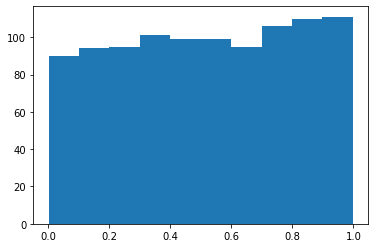

In [88]:
plt.hist(p_value)

распределение p_value близко к равномерному, что означает: вероятность возникновение любого значения p_value равновероятно. Когда мы ставим p_value < 0.01 то в этот диапазон попадает 1% наблюдений, когда p_value < 0.05 соотв 5% наблюдений

Как только у вас равномерное распределение p_value (а это следует ожидать) то у вас могут появляться любые значения, даже если никакой разницы там нет. Чем больше сравниваете, тем вероятнее ожидать ошибки.